In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from const_mesolve import const_mesolve

In [2]:
# 3P1 linewidth 
Gamma = 182e3 * 2 * np.pi

# I_sat: 0.14 W/cm^2
I_sat = 0.14

# Branching ratio:
# --    --    --  --
#  \    |     /
#   1  2/3  1/3
#       --

In [3]:
def Freq_offset(B=60):
    return (np.array([0, 3, 3, 0])           # Tensor light shift
            + 1.4*B*np.array([0, 1, 2, 3])   # Zeeman splitting
            + 0.1)*2e6*np.pi                 # Detuning from -3/2

def Zeeman_01(B=60):
    return -750*B*2*np.pi

def R_sc(detuning, I=I_sat):
    return Gamma/2*(I/I_sat)/(1+4*(detuning/Gamma)**2+I/I_sat)

# def Omega_s2p(B=60, I=I_sat):
#     Omega_ = Gamma*np.sqrt(I/(3*2*I_sat))
#     return Omega_

In [4]:
R_sc(2*np.pi*50e6, 3*I_sat)#/2/np.pi

5.681716201672969

In [5]:
M_02 = np.array([[0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
M_03 = np.array([[0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
M_04 = np.array([[0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
M_13 = np.array([[0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
M_14 = np.array([[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
M_15 = np.array([[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0]])
Hx_02 = Qobj(M_02)
Hx_03 = Qobj(M_03)
Hx_04 = Qobj(M_04)
Hx_13 = Qobj(M_13)
Hx_14 = Qobj(M_14)
Hx_15 = Qobj(M_15)

M_20 = np.array([[0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
M_30 = np.array([[0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
M_40 = np.array([[0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
M_31 = np.array([[0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
M_41 = np.array([[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
M_51 = np.array([[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
C_20 = Qobj(M_20)
C_30 = Qobj(M_30)
C_40 = Qobj(M_40)
C_31 = Qobj(M_31)
C_41 = Qobj(M_41)
C_51 = Qobj(M_51)

In [6]:
# C_51
# fock_dm(6, 5)

In [48]:
def H_full(tList, B=60, I=3*I_sat):
    # (1S0, mF=-1/2), (1S0, mF=1/2), (3P1, mF=-3/2), (3P1, mF=-1/2), (3P1, mF=1/2), (3P1, mF=3/2)
    Omega_s2p = Gamma*np.sqrt(I/(3*2*I_sat))
    H = Zeeman_01(B)*fock_dm(6, 1) + Freq_offset(B)[0]*fock_dm(6, 2) + Freq_offset(B)[1]*fock_dm(6, 3) \
        + Freq_offset(B)[2]*fock_dm(6, 4) + Freq_offset(B)[3]*fock_dm(6, 5) + Omega_s2p*(Hx_02+2/3*Hx_03+1/3*Hx_04+1/3*Hx_13+2/3*Hx_14+Hx_15)
        
    c_ops = [np.sqrt(Gamma)*C_20, 
             np.sqrt(Gamma*2/3)*C_30, 
             np.sqrt(Gamma*1/3)*C_40, 
             np.sqrt(Gamma*1/3)*C_31, 
             np.sqrt(Gamma*2/3)*C_41, 
             np.sqrt(Gamma)*C_51, ]
    
    psi_0 = fock(6, 0)
    obs = [fock_dm(6, 0), fock_dm(6, 1), fock_dm(6, 2),
           fock_dm(6, 3), fock_dm(6, 4), fock_dm(6, 5)]
    
    states = const_mesolve(H, psi_0, tList, c_ops, obs).expect
    
    return states

In [63]:
tList = np.linspace(0, 10, 1501)
test = H_full(tList, I=3*I_sat)

(-0.05, 1.05)

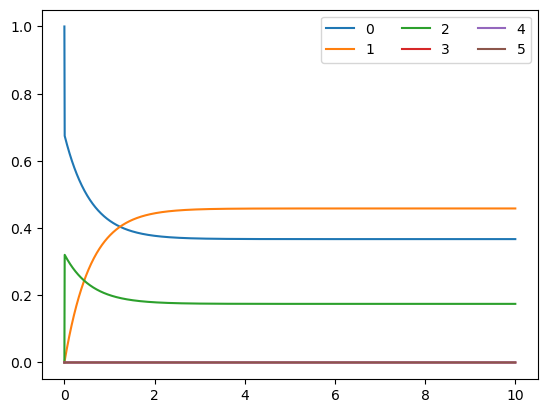

In [64]:
plt.plot(tList, test[0], label="0")
plt.plot(tList, test[1], label="1")
plt.plot(tList, test[2], label="2")
plt.plot(tList, test[3], label="3")
plt.plot(tList, test[4], label="4")
plt.plot(tList, test[5], label="5")
plt.legend(ncol=3)
plt.ylim([-0.05, 1.05])
# # np.array(test).shape
# test[0]

In [10]:
test = (tensor(fock(4, 2), fock(4, 0).dag()))
# test
test.dims=[4, 4]
test.type
# test.type='oper'

'other'

In [11]:
M_02 = np.array([[0, 0, 1, 0], [0, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0]])
M_03 = np.array([[0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0], [1, 0, 0, 0]])
M_13 = np.array([[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 1, 0, 0]])
Qobj(M_13)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]

In [12]:
Hx_13

Quantum object: dims = [[6], [6]], shape = (6, 6), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]